In [2]:
# Import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp

In [3]:
# read data
df = pd.read_pickle("../../data/raw/df_resample_100ms.pkl")

In [4]:
df

acc_x      acc_y     acc_z    gyro_x    gyro_y  \
timestamp                                                                    
1970-01-01 00:38:38.700  0.948777  -9.636166  0.002699  0.003818  0.016875   
1970-01-01 00:38:38.800  0.948993  -9.759188  0.087482  0.020693  0.027565   
1970-01-01 00:38:38.900  1.071514  -9.787465 -0.093610  0.168721  0.075747   
1970-01-01 00:38:39.000  1.135679  -9.754036  0.065878  0.339488  0.078970   
1970-01-01 00:38:39.100  1.126174  -9.443248  0.075006  0.594494 -0.012065   
...                           ...        ...       ...       ...       ...   
1970-01-01 04:49:55.200  2.128992  14.084110  0.907692 -1.022787  0.162796   
1970-01-01 04:49:55.300 -1.563028  11.139874  1.061856 -2.417346 -0.699792   
1970-01-01 04:49:55.400  2.767679   8.869539  0.154884 -0.998184  0.612194   
1970-01-01 04:49:55.500  0.149554   5.565219  2.023148  0.629237  0.462074   
1970-01-01 04:49:55.600  5.108846   9.221981  4.497037  0.958338 -0.160963   

                           gyro_z label  subject_id  trial   age  height  \
timestamp                                                                  
1970-01-01 00:38:38.700  0.006643   BSC         1.0    1.0  32.0   180.0   
1970-01-01 00:38:38.800  0.015669   BSC         1.0    1.0  32.0   180.0   
1970-01-01 00:38:38.900  0.037797   BSC         1.0    1.0  32.0   180.0   
1970-01-01 00:38:39.000  0.040134   BSC         1.0    1.0  32.0   180.0   
1970-01-01 00:38:39.100  0.103557   BSC         1.0    1.0  32.0   180.0   
...                           ...   ...         ...    ...   ...     ...   
1970-01-01 04:49:55.200  0.609964   WAL        67.0    1.0  23.0   180.0   
1970-01-01 04:49:55.300  1.861551   WAL        67.0    1.0  23.0   180.0   
1970-01-01 04:49:55.400  1.557859   WAL        67.0    1.0  23.0   180.0   
1970-01-01 04:49:55.500 -0.136162   WAL        67.0    1.0  23.0   180.0   
1970-01-01 04:49:55.600 -0.892430   WAL        67.0    1.0  23.0   180.0   

                         weight gender  
timestamp                               
1970-01-01 00:38:38.700    85.0      M  
1970-01-01 00:38:38.800    85.0      M  
1970-01-01 00:38:38.900    85.0      M  
1970-01-01 00:38:39.000    85.0      M  
1970-01-01 00:38:39.100    85.0      M  
...                         ...    ...  
1970-01-01 04:49:55.200    67.0      M  
1970-01-01 04:49:55.300    67.0      M  
1970-01-01 04:49:55.400    67.0      M  
1970-01-01 04:49:55.500    67.0      M  
1970-01-01 04:49:55.600    67.0      M  

[846950 rows x 13 columns]

## 2. Visualization: 

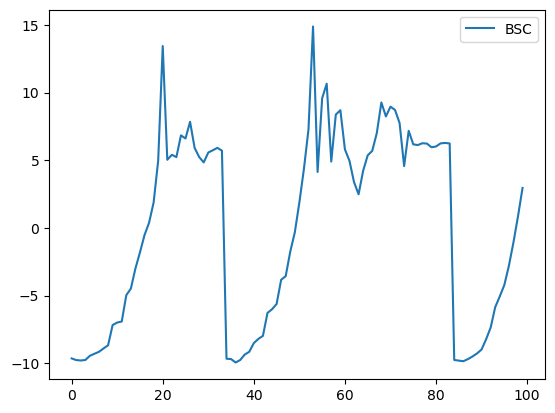

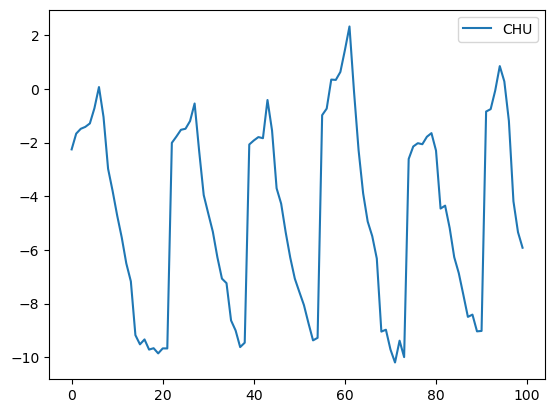

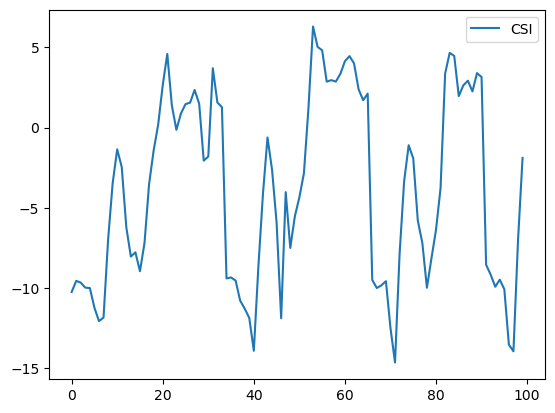

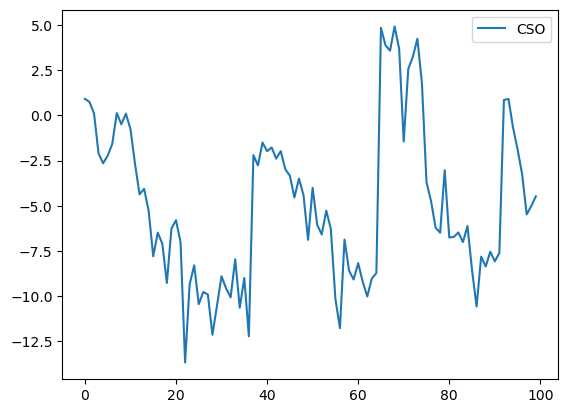

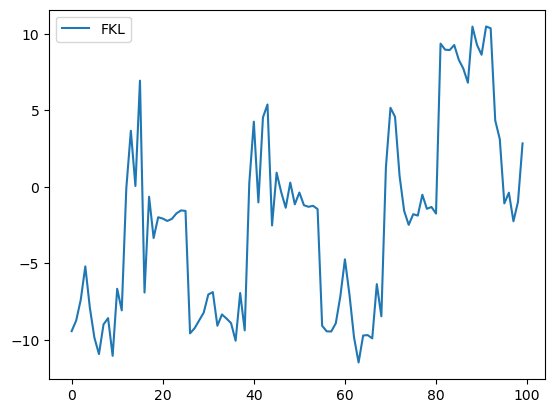

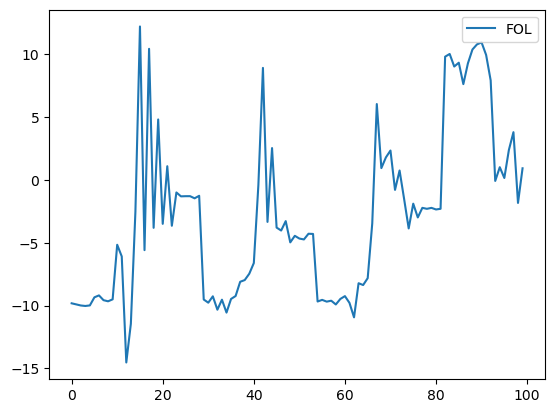

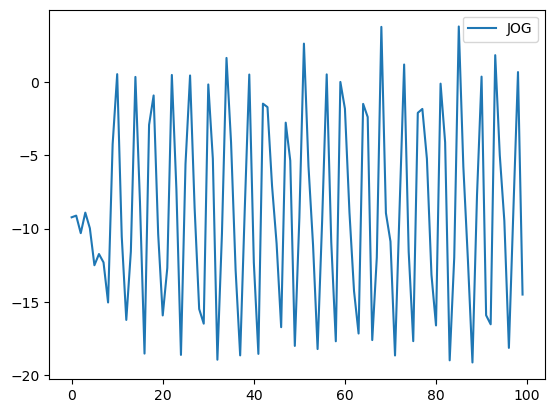

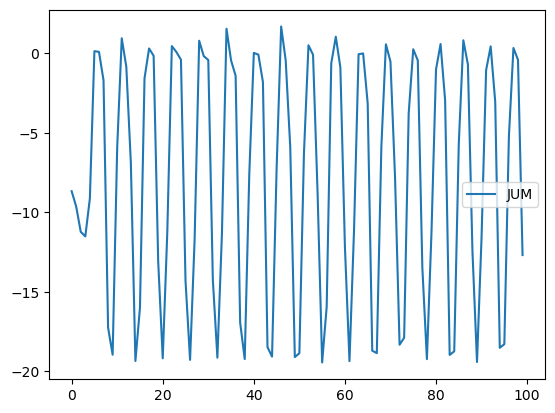

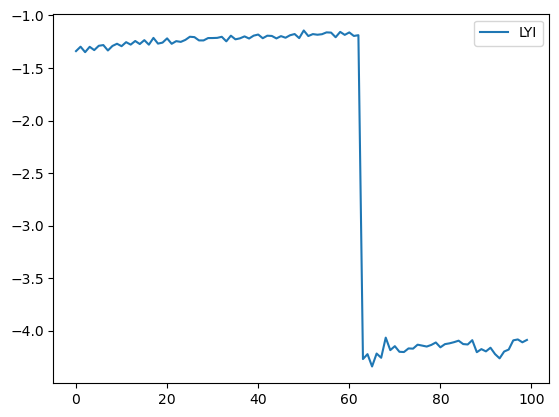

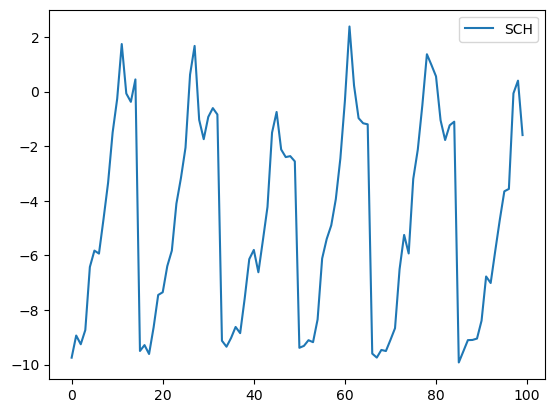

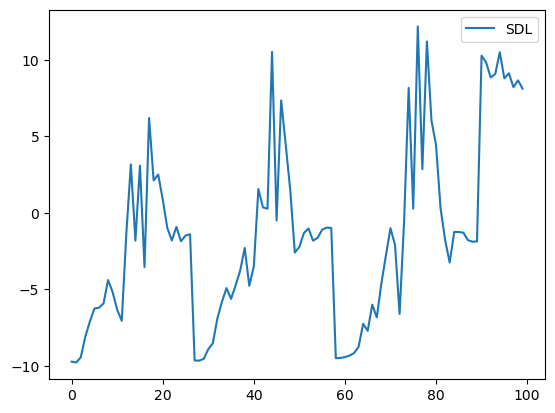

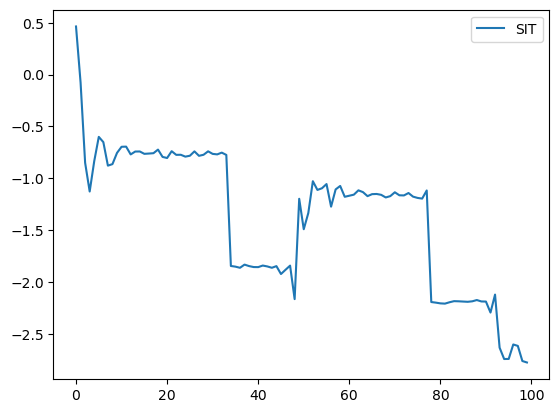

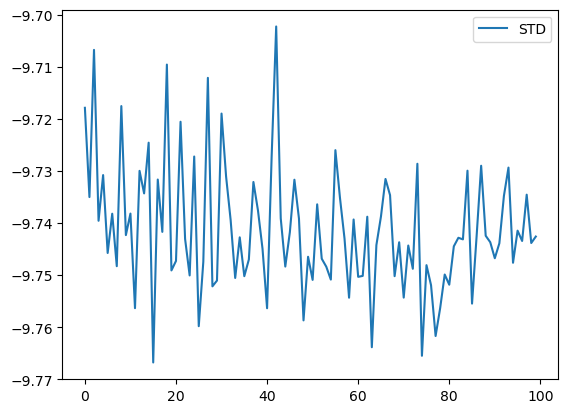

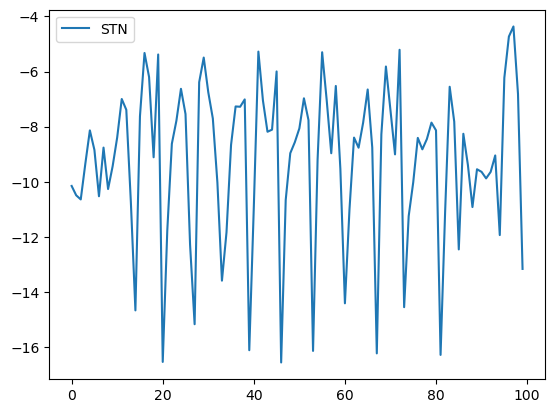

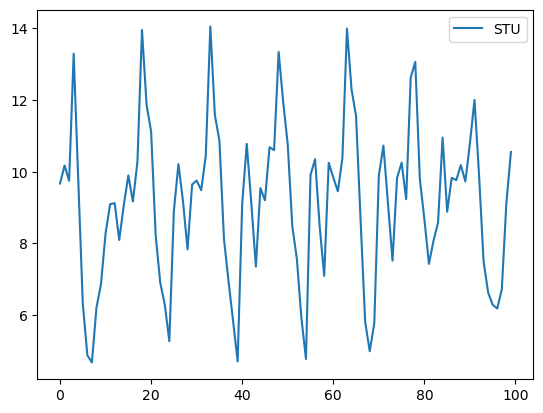

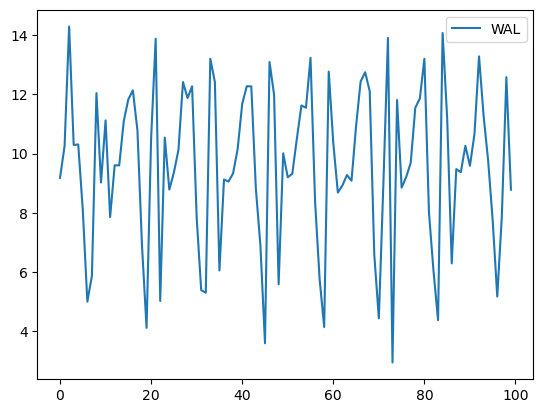

In [5]:
# Plot all label

for label in df["label"].unique():
    subset = df[df["label"] == label]
    fig, ax = plt.subplots()
    plt.plot(subset[:100]['acc_y'].reset_index(drop=True), label=label)
    plt.legend()
    plt.show()

In [6]:
# Compare between fall and non-fall activities

# Create label for fall in the df
fall_labels = ["FOL", "FKL", "BSC", "SDL"]

df["category"] = np.where(df["label"].isin(fall_labels), "fall", "adl")


In [7]:
df["category"].value_counts()

category
adl     827646
fall     19304
Name: count, dtype: int64

In [8]:
fall_df = df[df["category"] == 'fall']
adl_df = df[df["category"] == 'adl']

In [9]:
fall_df['subject_id'].nunique()

64

In [10]:
adl_df['subject_id'].nunique()

67

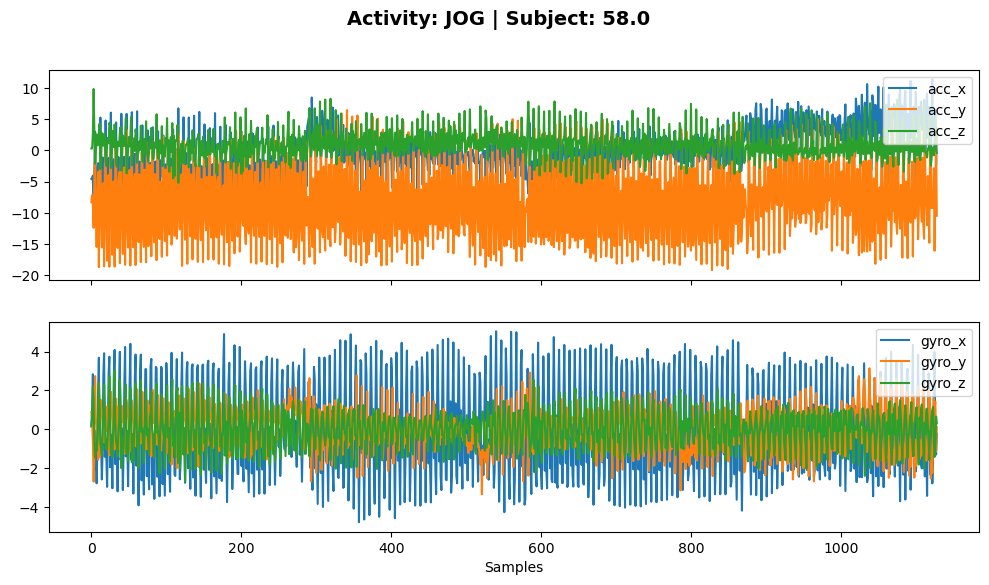

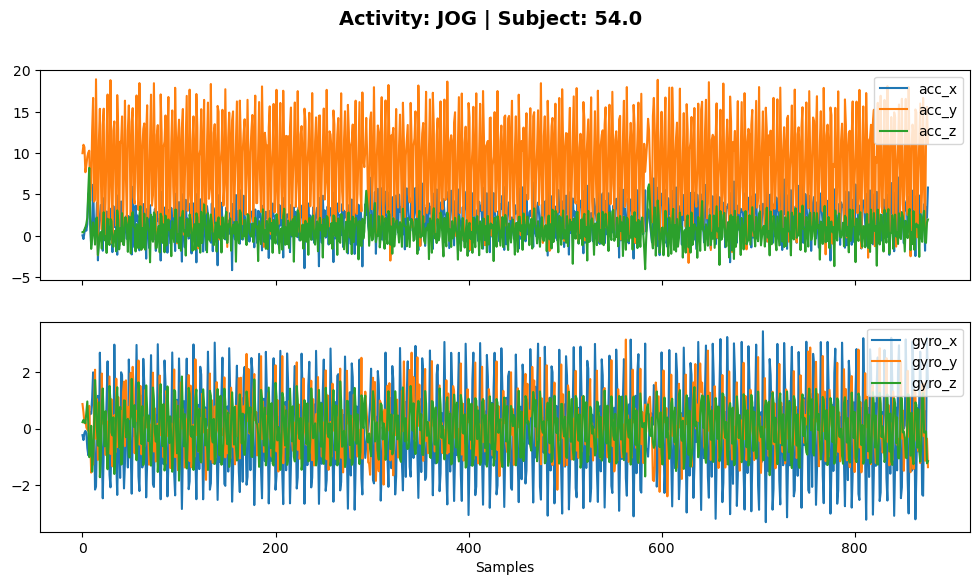

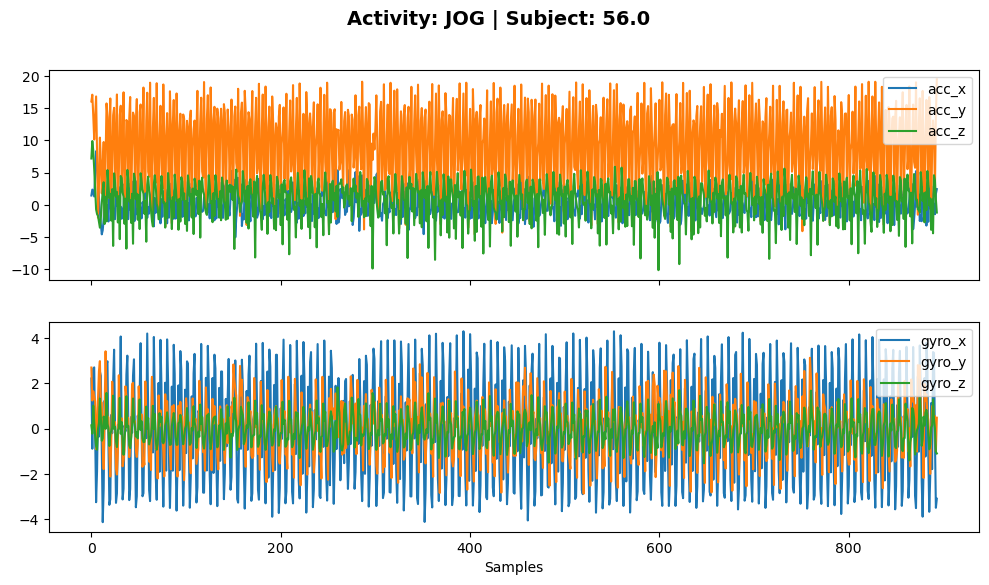

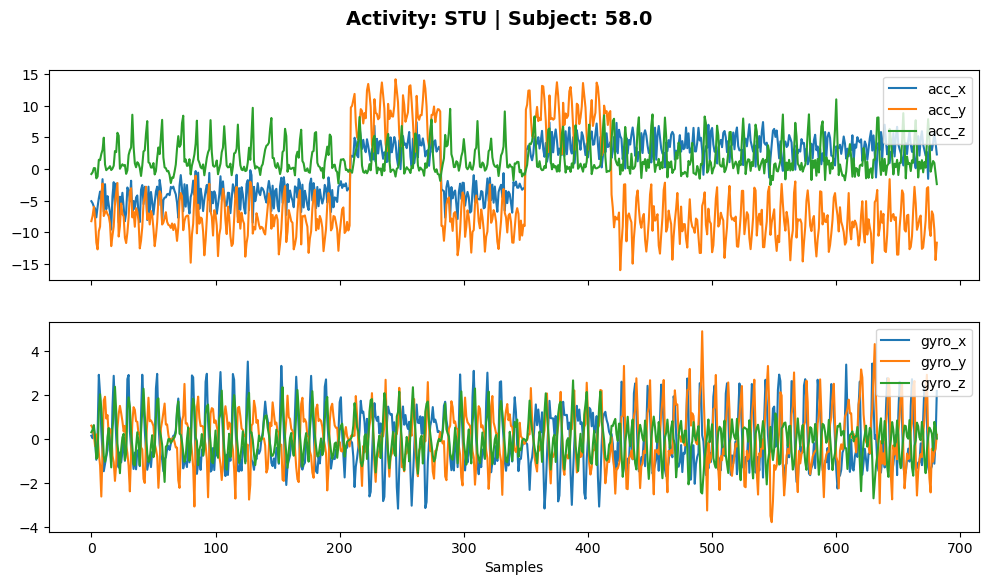

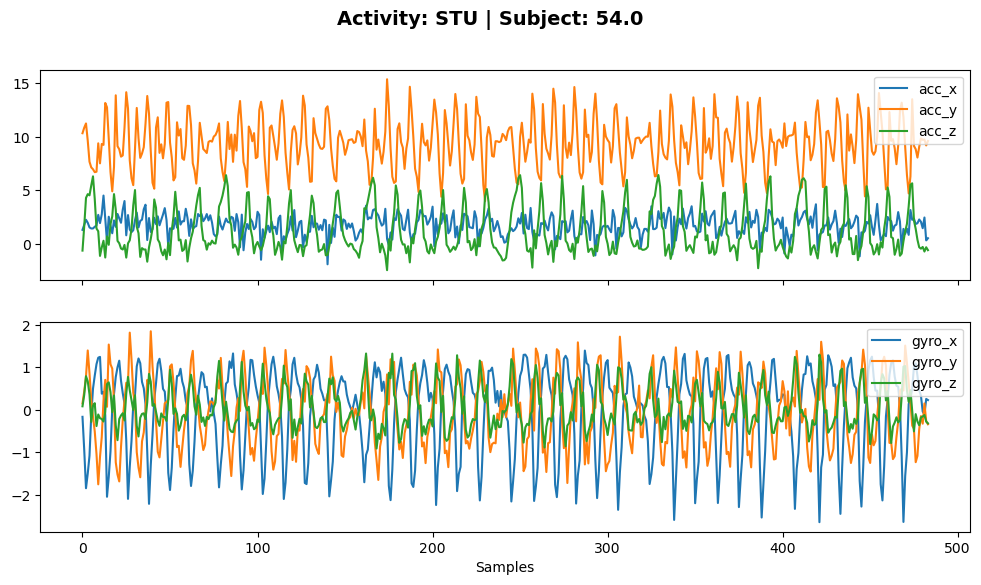

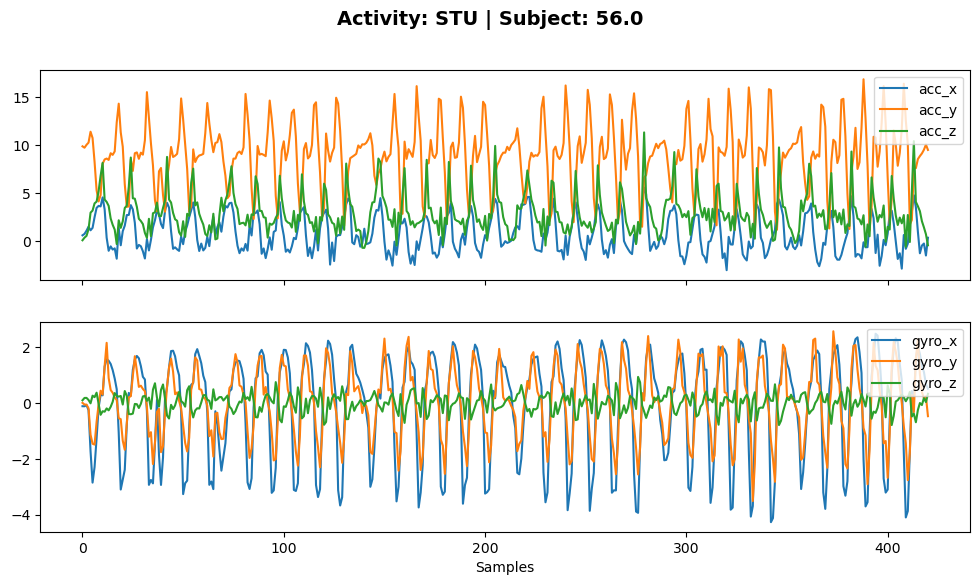

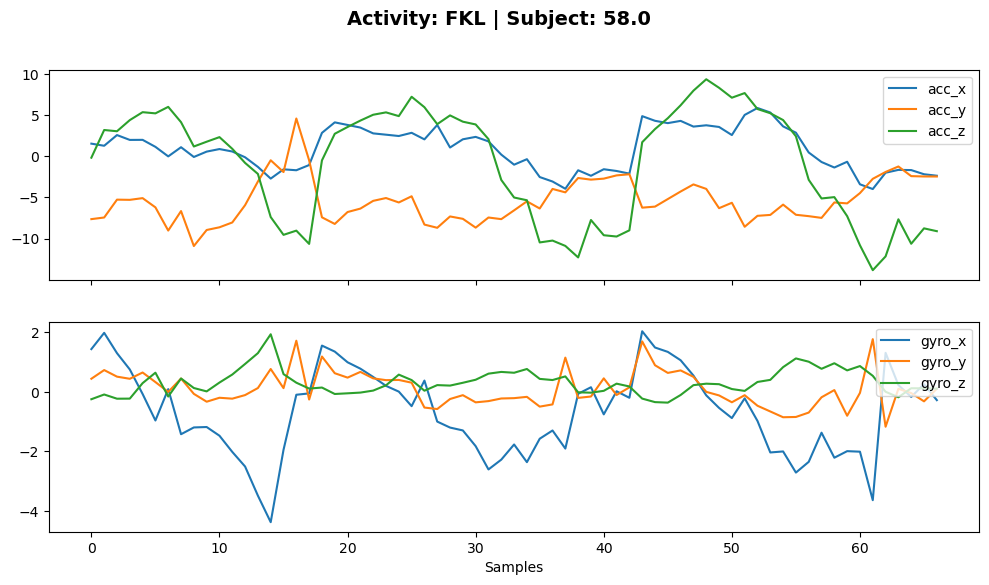

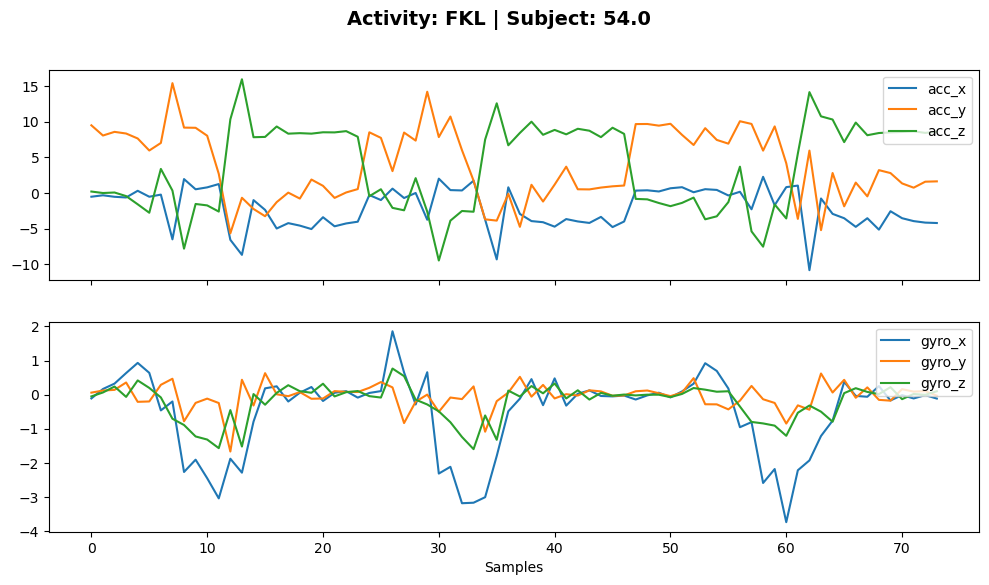

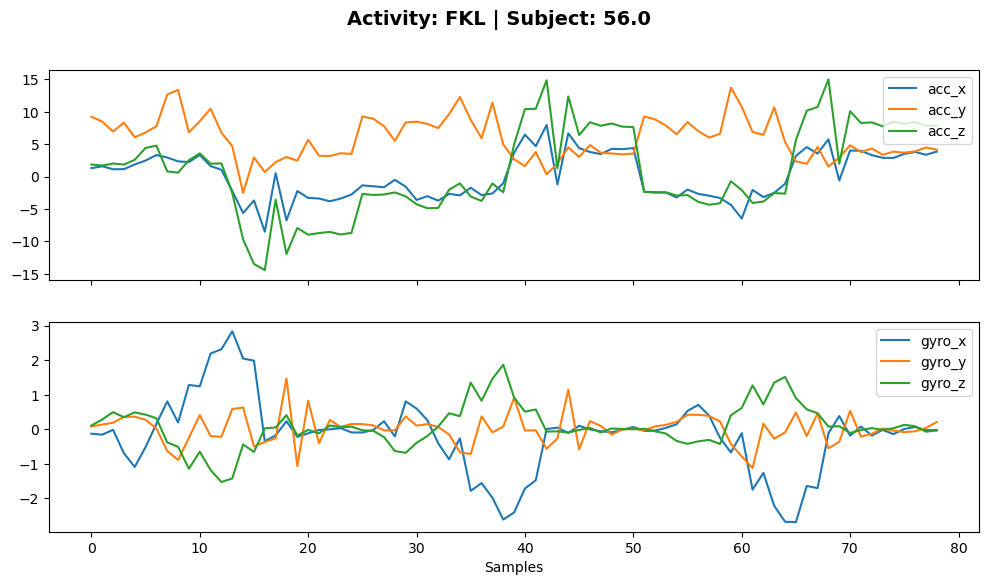

In [11]:
# Compare accross different activities
plot_count = 0
max_plots = 10

labels = df['label'].unique()
subjects = df['subject_id'].unique()

# Select a random subset of labels and subjects to speed up execution
num_labels = min(3, len(labels))  # Limit the number of labels
num_subjects = min(3, len(subjects))  # Limit the number of subjects

sampled_labels = np.random.choice(labels, num_labels, replace=False)
sampled_subjects = np.random.choice(subjects, num_subjects, replace=False)

for label in sampled_labels:
    for subject in sampled_subjects:
        all_axis_df = df.loc[
            (df['label'] == label) & 
            (df['subject_id'] == subject)
        ].reset_index()

        if len(all_axis_df) > 0:
            fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))  # Adjusted figure size
            all_axis_df[["acc_x", "acc_y", "acc_z"]].plot(ax=ax[0])
            all_axis_df[["gyro_x", "gyro_y", "gyro_z"]].plot(ax=ax[1])

            ax[0].legend(loc="upper right")
            ax[1].legend(loc="upper right")
            ax[1].set_xlabel("Samples")

            # Add Title
            fig.suptitle(f"Activity: {label} | Subject: {subject}", fontsize=14, fontweight="bold")
            plt.show()

            plot_count += 1
            if plot_count >= max_plots:
                break
    if plot_count >= max_plots:
        break



The patterns are clear accross different activities 

## 3. Outliers detection

In [12]:
df

acc_x      acc_y     acc_z    gyro_x    gyro_y  \
timestamp                                                                    
1970-01-01 00:38:38.700  0.948777  -9.636166  0.002699  0.003818  0.016875   
1970-01-01 00:38:38.800  0.948993  -9.759188  0.087482  0.020693  0.027565   
1970-01-01 00:38:38.900  1.071514  -9.787465 -0.093610  0.168721  0.075747   
1970-01-01 00:38:39.000  1.135679  -9.754036  0.065878  0.339488  0.078970   
1970-01-01 00:38:39.100  1.126174  -9.443248  0.075006  0.594494 -0.012065   
...                           ...        ...       ...       ...       ...   
1970-01-01 04:49:55.200  2.128992  14.084110  0.907692 -1.022787  0.162796   
1970-01-01 04:49:55.300 -1.563028  11.139874  1.061856 -2.417346 -0.699792   
1970-01-01 04:49:55.400  2.767679   8.869539  0.154884 -0.998184  0.612194   
1970-01-01 04:49:55.500  0.149554   5.565219  2.023148  0.629237  0.462074   
1970-01-01 04:49:55.600  5.108846   9.221981  4.497037  0.958338 -0.160963   

                           gyro_z label  subject_id  trial   age  height  \
timestamp                                                                  
1970-01-01 00:38:38.700  0.006643   BSC         1.0    1.0  32.0   180.0   
1970-01-01 00:38:38.800  0.015669   BSC         1.0    1.0  32.0   180.0   
1970-01-01 00:38:38.900  0.037797   BSC         1.0    1.0  32.0   180.0   
1970-01-01 00:38:39.000  0.040134   BSC         1.0    1.0  32.0   180.0   
1970-01-01 00:38:39.100  0.103557   BSC         1.0    1.0  32.0   180.0   
...                           ...   ...         ...    ...   ...     ...   
1970-01-01 04:49:55.200  0.609964   WAL        67.0    1.0  23.0   180.0   
1970-01-01 04:49:55.300  1.861551   WAL        67.0    1.0  23.0   180.0   
1970-01-01 04:49:55.400  1.557859   WAL        67.0    1.0  23.0   180.0   
1970-01-01 04:49:55.500 -0.136162   WAL        67.0    1.0  23.0   180.0   
1970-01-01 04:49:55.600 -0.892430   WAL        67.0    1.0  23.0   180.0   

                         weight gender category  
timestamp                                        
1970-01-01 00:38:38.700    85.0      M     fall  
1970-01-01 00:38:38.800    85.0      M     fall  
1970-01-01 00:38:38.900    85.0      M     fall  
1970-01-01 00:38:39.000    85.0      M     fall  
1970-01-01 00:38:39.100    85.0      M     fall  
...                         ...    ...      ...  
1970-01-01 04:49:55.200    67.0      M      adl  
1970-01-01 04:49:55.300    67.0      M      adl  
1970-01-01 04:49:55.400    67.0      M      adl  
1970-01-01 04:49:55.500    67.0      M      adl  
1970-01-01 04:49:55.600    67.0      M      adl  

[846950 rows x 14 columns]

### 3.1 Box plot to visualize outliers

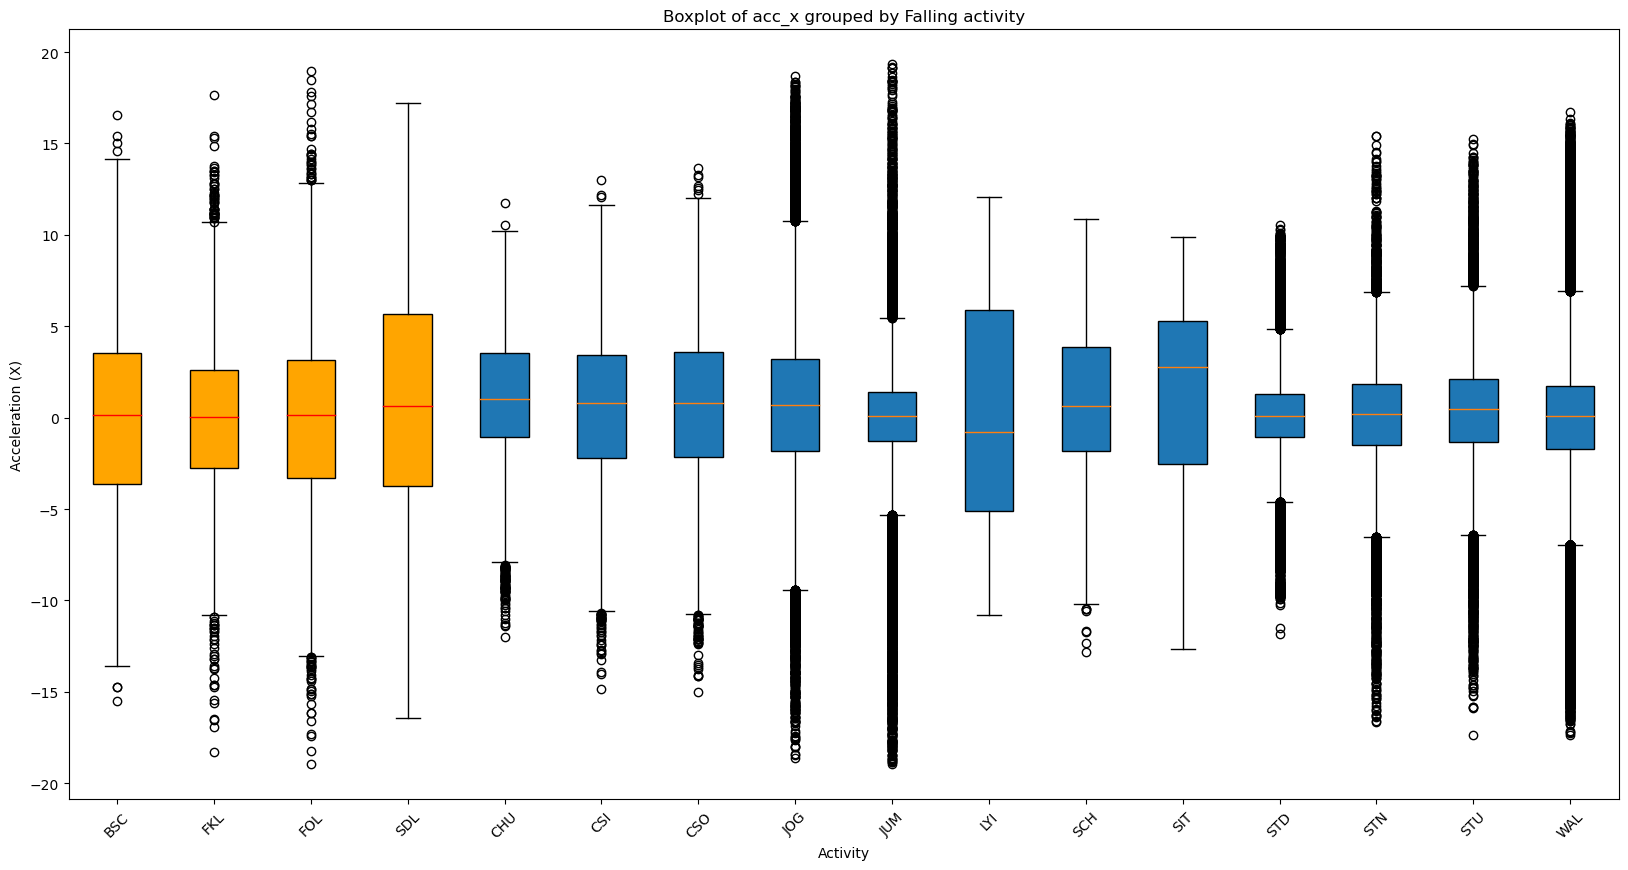

In [13]:
# Define highlighted activities
highlight_activities = {'FOL', 'FKL', 'BSC', 'SDL'}

# Reorder activities to move highlighted ones to the left
sorted_activities = sorted(df['label'].unique())  # Sort all activities
activity_order = sorted(highlight_activities) + [act for act in sorted_activities if act not in highlight_activities]

# Create figure and boxplot
plt.figure(figsize=(20, 10))

# Create boxplot using Matplotlib for customization
box = plt.boxplot([df[df['label'] == act]['acc_x'] for act in activity_order], 
                  patch_artist=True, labels=activity_order)

# Highlight specific boxes
for i, act in enumerate(activity_order):
    if act in highlight_activities:
        box['boxes'][i].set_facecolor('orange')  # Change box color
        box['medians'][i].set_color('red')  # Change median line color for emphasis

# Customize title and labels
plt.title("Boxplot of acc_x grouped by Falling activity")
plt.xlabel("Activity")
plt.ylabel("Acceleration (X)")
plt.xticks(rotation=45)

plt.show()

We can see that most outliers of acc_x are in the ADL activities.

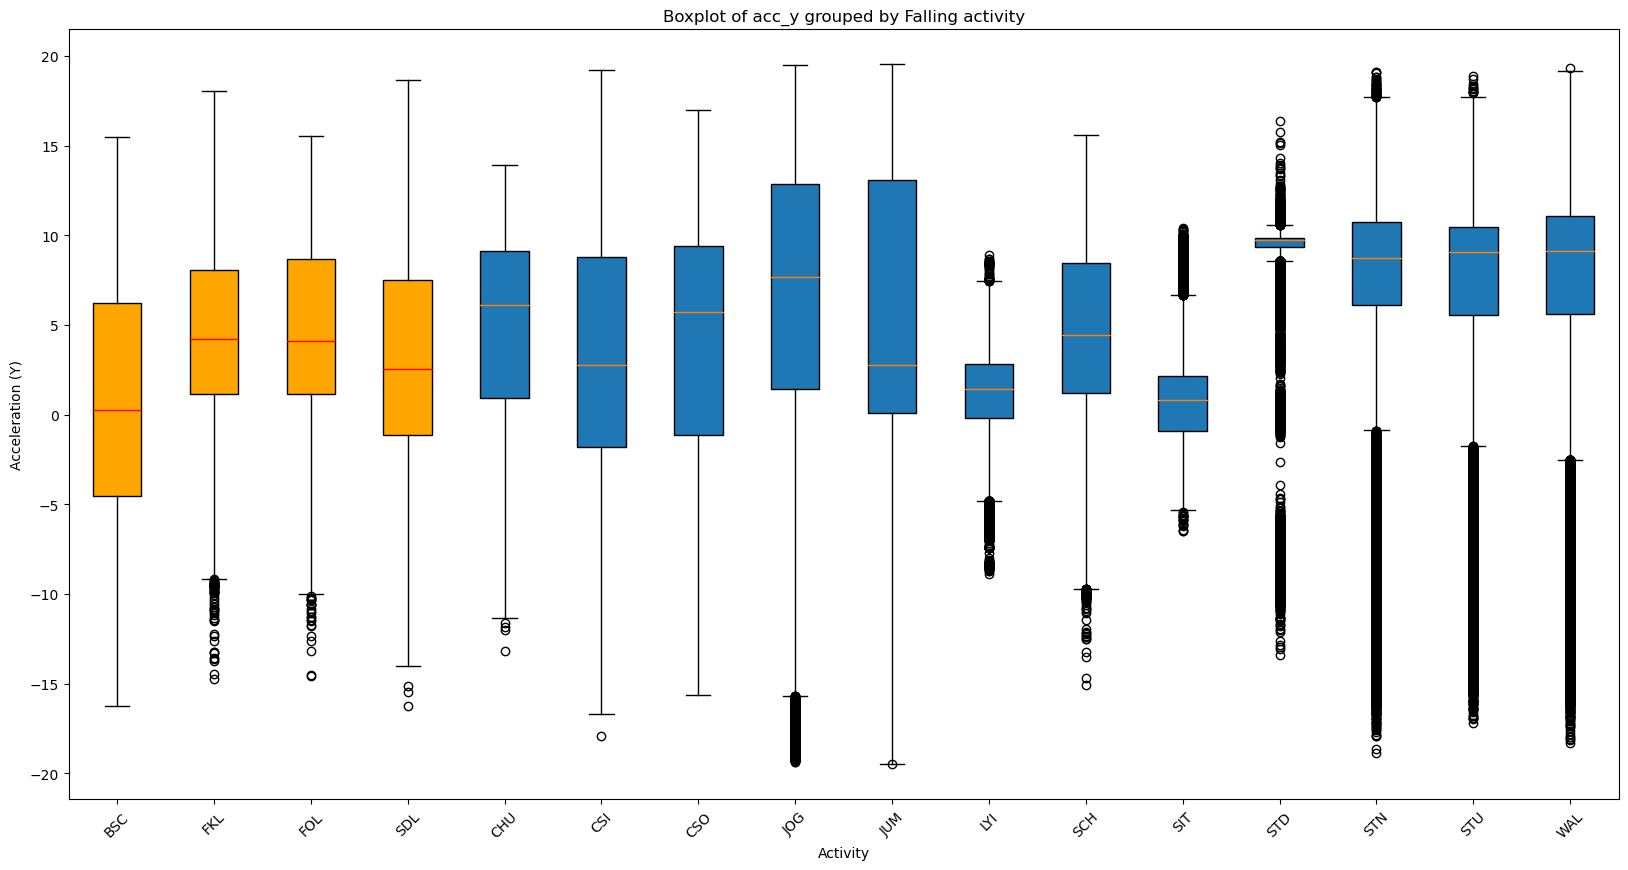

In [14]:
# Define highlighted activities
highlight_activities = {'FOL', 'FKL', 'BSC', 'SDL'}

# Reorder activities to move highlighted ones to the left
sorted_activities = sorted(df['label'].unique())  # Sort all activities
activity_order = sorted(highlight_activities) + [act for act in sorted_activities if act not in highlight_activities]

# Create figure and boxplot
plt.figure(figsize=(20, 10))

# Create boxplot using Matplotlib for customization
box = plt.boxplot([df[df['label'] == act]['acc_y'] for act in activity_order], 
                  patch_artist=True, labels=activity_order)

# Highlight specific boxes
for i, act in enumerate(activity_order):
    if act in highlight_activities:
        box['boxes'][i].set_facecolor('orange')  # Change box color
        box['medians'][i].set_color('red')  # Change median line color for emphasis

# Customize title and labels
plt.title("Boxplot of acc_y grouped by Falling activity")
plt.xlabel("Activity")
plt.ylabel("Acceleration (Y)")
plt.xticks(rotation=45)

plt.show()

#### Define some functions to mark and visualized outliers

In [15]:
def plot_binary_outliers(dataset, col, outlier_col, reset_index):
    """ Plot outliers in case of a binary outlier score. Here, the col specifies the real data
    column and outlier_col the columns with a binary value (outlier or not).

    Args:
        dataset (pd.DataFrame): The dataset
        col (string): Column that you want to plot
        outlier_col (string): Outlier column marked with true/false
        reset_index (bool): whether to reset the index for plotting
    """

    # Taken from: https://github.com/mhoogen/ML4QS/blob/master/Python3Code/util/VisualizeDataset.py
    # Additional ref: https://www.youtube.com/watch?v=PyYjTA9oa5w&list=PL-Y17yukoyy0sT2hoSQxn1TdV0J7-MX4K&index=5

    dataset = dataset.dropna(axis=0, subset=[col, outlier_col])
    dataset[outlier_col] = dataset[outlier_col].astype("bool")

    if reset_index:
        dataset = dataset.reset_index()

    fig, ax = plt.subplots()

    plt.xlabel("samples")
    plt.ylabel("value")

    # Plot non outliers in default color
    ax.plot(
        dataset.index[~dataset[outlier_col]],
        dataset[col][~dataset[outlier_col]],
        "+",
    )
    # Plot data points that are outliers in red
    ax.plot(
        dataset.index[dataset[outlier_col]],
        dataset[col][dataset[outlier_col]],
        "r+",
    )

    plt.legend(
        ["no outlier " + col, "outlier " + col],
        loc="upper center",
        ncol=2,
        fancybox=True,
        shadow=True,
    )
    plt.show()

In [16]:
# Assign outliers by interquartile range
def mark_outliers_iqr(dataset, col):
    """Function to mark values as outliers using the IQR method.

    Args:
        dataset (pd.DataFrame): The dataset
        col (string): The column you want apply outlier detection to

    Returns:
        pd.DataFrame: The original dataframe with an extra boolean column 
        indicating whether the value is an outlier or not.
    """

    dataset = dataset.copy()

    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    dataset[col + "_outlier"] = (dataset[col] < lower_bound) | (
        dataset[col] > upper_bound
    )

    return dataset

In [17]:
import math
import scipy

def mark_outliers_chauvenet(dataset, col, C=2):
    """Finds outliers in the specified column of datatable and adds a binary column with
    the same name extended with '_outlier' that expresses the result per data point.
    
    Taken from: https://github.com/mhoogen/ML4QS/blob/master/Python3Code/Chapter3/OutlierDetection.py

    Args:
        dataset (pd.DataFrame): The dataset
        col (string): The column you want apply outlier detection to
        C (int, optional): Degree of certainty for the identification of outliers given the assumption 
                           of a normal distribution, typicaly between 1 - 10. Defaults to 2.

    Returns:
        pd.DataFrame: The original dataframe with an extra boolean column 
        indicating whether the value is an outlier or not.
    """

    dataset = dataset.copy()
    # Compute the mean and standard deviation.
    mean = dataset[col].mean()
    std = dataset[col].std()
    N = len(dataset.index)
    criterion = 1.0 / (C * N)

    # Consider the deviation for the data points.
    deviation = abs(dataset[col] - mean) / std

    # Express the upper and lower bounds.
    low = -deviation / math.sqrt(C)
    high = deviation / math.sqrt(C)
    prob = []
    mask = []

    # Pass all rows in the dataset.
    for i in range(0, len(dataset.index)):
        # Determine the probability of observing the point
        prob.append(
            1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))
        )
        # And mark as an outlier when the probability is below our criterion.
        mask.append(prob[i] < criterion)
    dataset[col + "_outlier"] = mask
    return dataset

In [33]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import pandas as pd

def mark_outliers_isolation_forest(dataset, col, contamination=0.005, n_estimators=200, random_state=42):
    """
    Identifies outliers in the specified column using Isolation Forest with standardization.

    Args:
        dataset (pd.DataFrame): The dataset.
        col (string): The column to apply outlier detection to.
        contamination (float, optional): The proportion of outliers in the data. Defaults to 0.01.
        n_estimators (int, optional): Number of trees in the Isolation Forest. Defaults to 200.
        random_state (int, optional): Random seed for reproducibility. Defaults to 42.

    Returns:
        pd.DataFrame: The original dataframe with an extra boolean column marking outliers.
    """
    dataset = dataset.copy()

    # Standardize the column
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(dataset[[col]])  # Standardize column

    # Initialize and fit Isolation Forest
    iso_forest = IsolationForest(n_estimators=n_estimators, contamination=contamination, random_state=random_state)
    dataset[col + "_outlier"] = iso_forest.fit_predict(X_scaled) == -1  # Mark -1 as outliers

    return dataset


Chauvenet criterion requires the dataset to be normally distributed

#### Scatterplot outliers

In [19]:
# Set fix parameter for graph
import matplotlib as mpl

mpl.style.use("seaborn-v0_8-deep")
mpl.rcParams["figure.figsize"] = (20,5)
mpl.rcParams["figure.dpi"] = 100
mpl.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.get_cmap("gist_ncar", 30)(np.linspace(0, 1, 30)))

C:\Users\sovan\AppData\Local\Temp\ipykernel_8492\2599826272.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  mpl.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.get_cmap("gist_ncar", 30)(np.linspace(0, 1, 30)))


In [20]:
outlier_columns = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']

##### Outliers detection using IQR

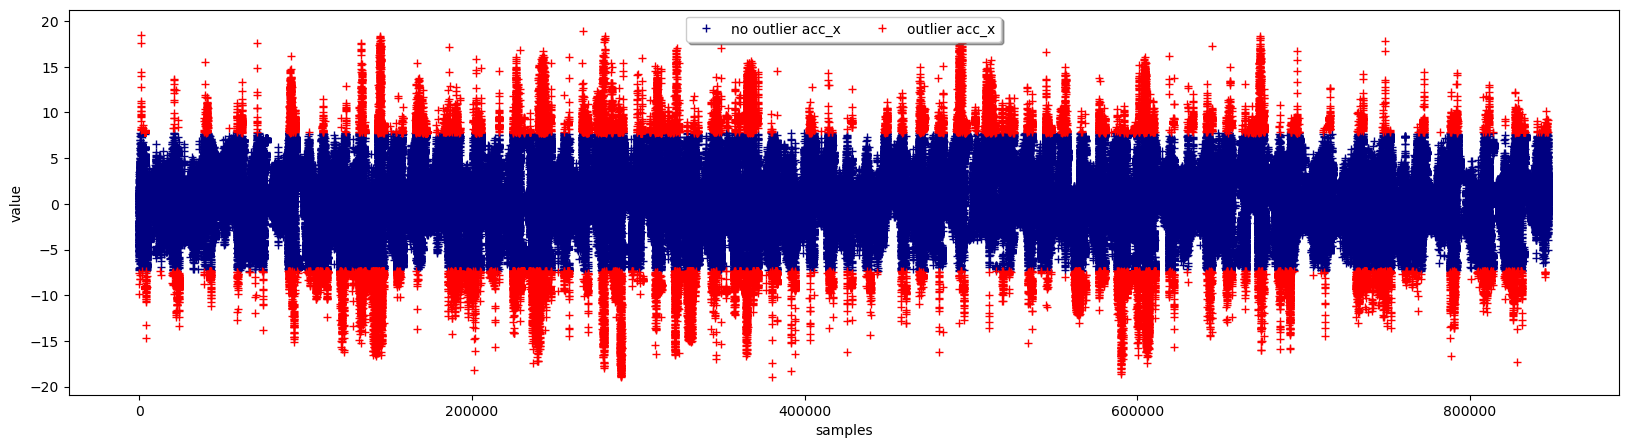

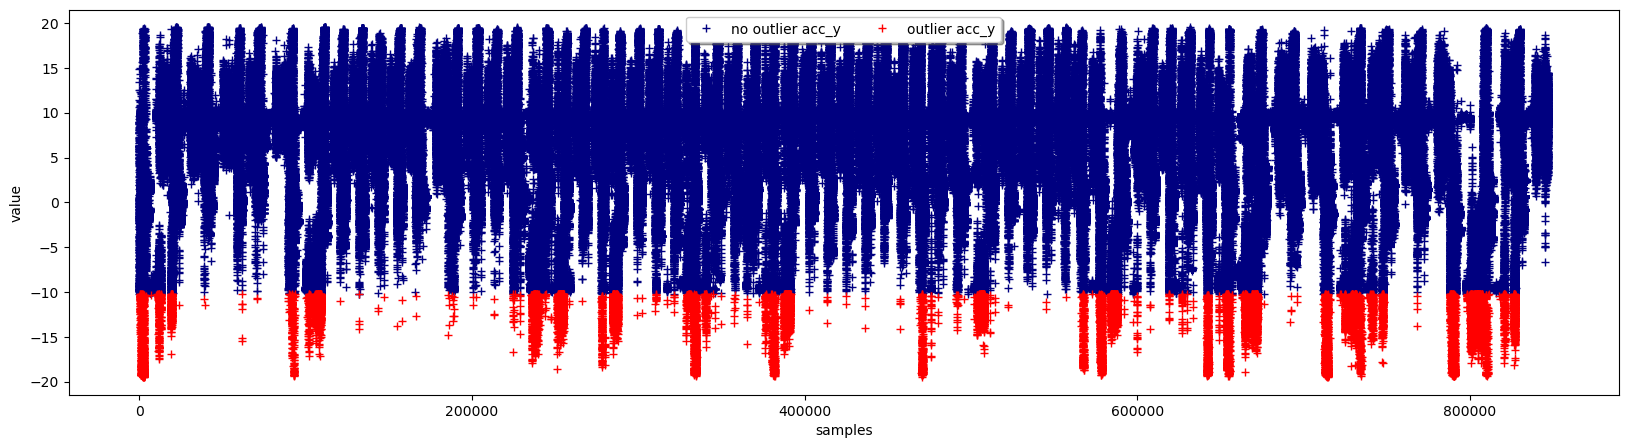

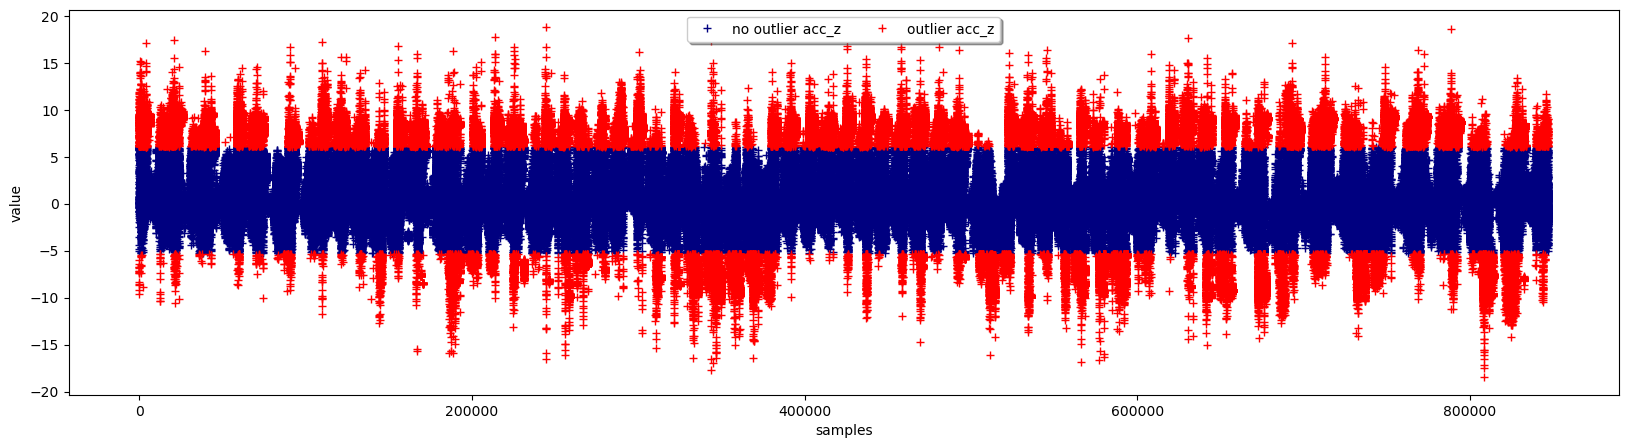

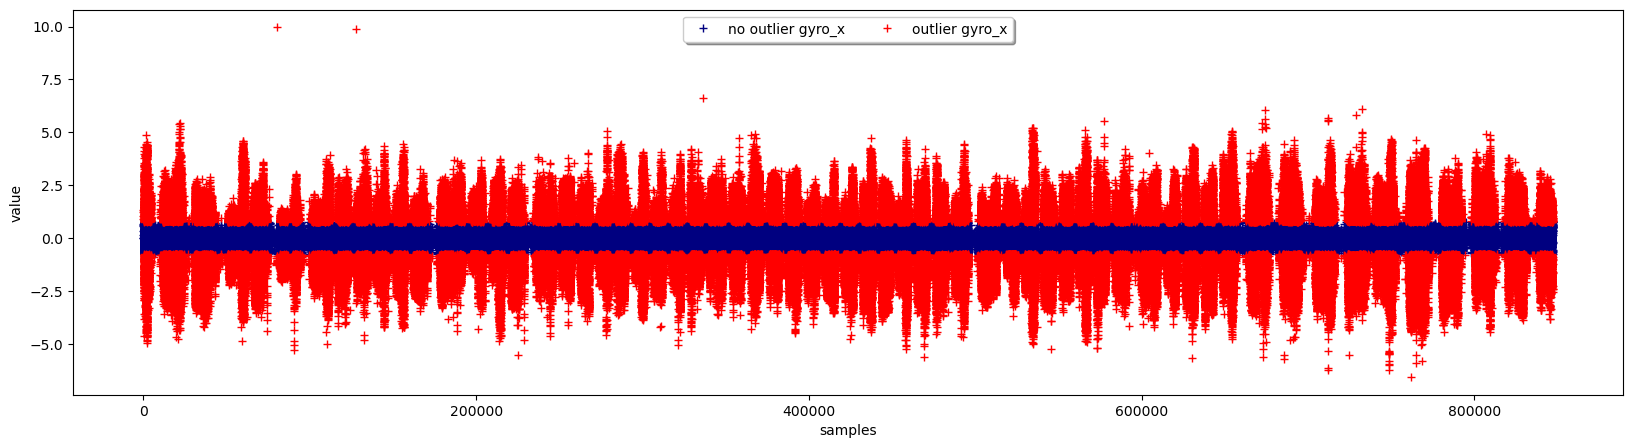

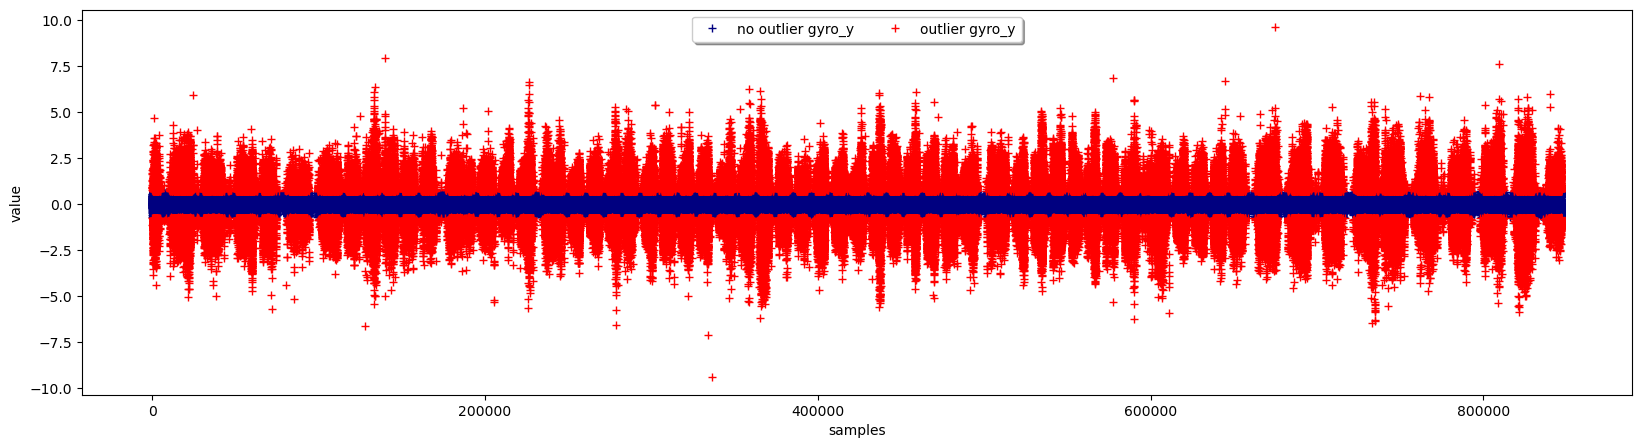

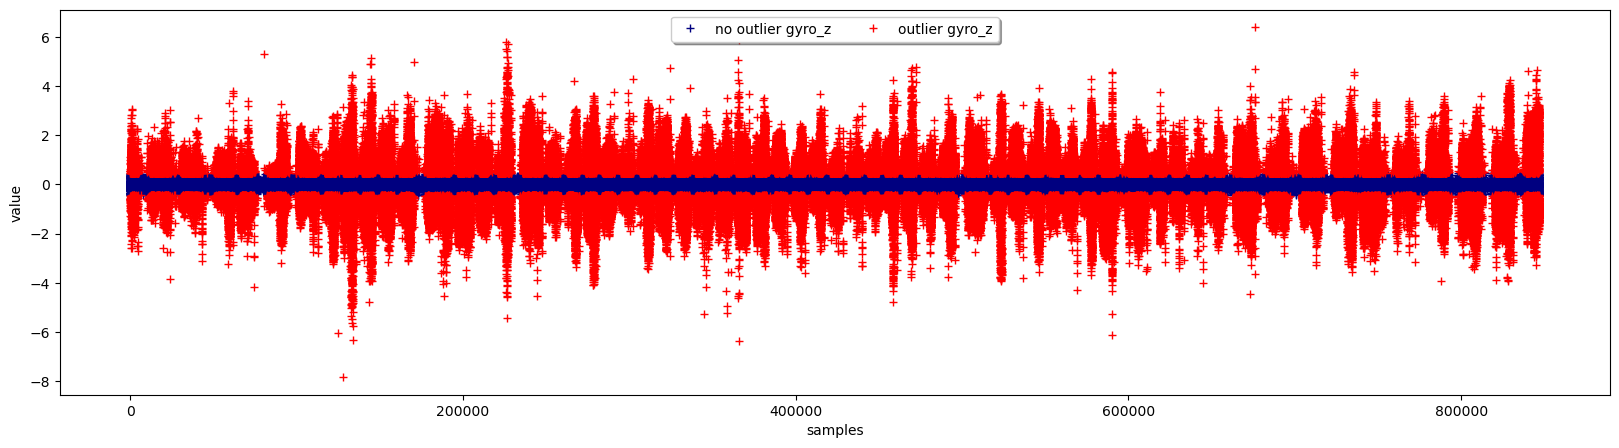

In [21]:
for col in outlier_columns:
    dataset = mark_outliers_iqr(df, col) # mark outliers using the pre-defined function
    plot_binary_outliers(dataset=dataset, col=col, outlier_col=col+"_outlier", reset_index =True)

Too many data will be lost if IQR is used. 

##### Outliers Detction using Chevanet Criterion

In [22]:
df

acc_x      acc_y     acc_z    gyro_x    gyro_y  \
timestamp                                                                    
1970-01-01 00:38:38.700  0.948777  -9.636166  0.002699  0.003818  0.016875   
1970-01-01 00:38:38.800  0.948993  -9.759188  0.087482  0.020693  0.027565   
1970-01-01 00:38:38.900  1.071514  -9.787465 -0.093610  0.168721  0.075747   
1970-01-01 00:38:39.000  1.135679  -9.754036  0.065878  0.339488  0.078970   
1970-01-01 00:38:39.100  1.126174  -9.443248  0.075006  0.594494 -0.012065   
...                           ...        ...       ...       ...       ...   
1970-01-01 04:49:55.200  2.128992  14.084110  0.907692 -1.022787  0.162796   
1970-01-01 04:49:55.300 -1.563028  11.139874  1.061856 -2.417346 -0.699792   
1970-01-01 04:49:55.400  2.767679   8.869539  0.154884 -0.998184  0.612194   
1970-01-01 04:49:55.500  0.149554   5.565219  2.023148  0.629237  0.462074   
1970-01-01 04:49:55.600  5.108846   9.221981  4.497037  0.958338 -0.160963   

                           gyro_z label  subject_id  trial   age  height  \
timestamp                                                                  
1970-01-01 00:38:38.700  0.006643   BSC         1.0    1.0  32.0   180.0   
1970-01-01 00:38:38.800  0.015669   BSC         1.0    1.0  32.0   180.0   
1970-01-01 00:38:38.900  0.037797   BSC         1.0    1.0  32.0   180.0   
1970-01-01 00:38:39.000  0.040134   BSC         1.0    1.0  32.0   180.0   
1970-01-01 00:38:39.100  0.103557   BSC         1.0    1.0  32.0   180.0   
...                           ...   ...         ...    ...   ...     ...   
1970-01-01 04:49:55.200  0.609964   WAL        67.0    1.0  23.0   180.0   
1970-01-01 04:49:55.300  1.861551   WAL        67.0    1.0  23.0   180.0   
1970-01-01 04:49:55.400  1.557859   WAL        67.0    1.0  23.0   180.0   
1970-01-01 04:49:55.500 -0.136162   WAL        67.0    1.0  23.0   180.0   
1970-01-01 04:49:55.600 -0.892430   WAL        67.0    1.0  23.0   180.0   

                         weight gender category  
timestamp                                        
1970-01-01 00:38:38.700    85.0      M     fall  
1970-01-01 00:38:38.800    85.0      M     fall  
1970-01-01 00:38:38.900    85.0      M     fall  
1970-01-01 00:38:39.000    85.0      M     fall  
1970-01-01 00:38:39.100    85.0      M     fall  
...                         ...    ...      ...  
1970-01-01 04:49:55.200    67.0      M      adl  
1970-01-01 04:49:55.300    67.0      M      adl  
1970-01-01 04:49:55.400    67.0      M      adl  
1970-01-01 04:49:55.500    67.0      M      adl  
1970-01-01 04:49:55.600    67.0      M      adl  

[846950 rows x 14 columns]

In [23]:
# Check if normal distributed

g = sns.FacetGrid(df, col="label", col_wrap=4, sharex=False, sharey=False)
g.map_dataframe(sns.kdeplot, x="acc_x", fill=True, alpha=0.3)
g.fig.suptitle("Density Plots of acc_x by Label", y=1.05)
plt.show()

NameError: name 'sns' is not defined

c:\Users\sovan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


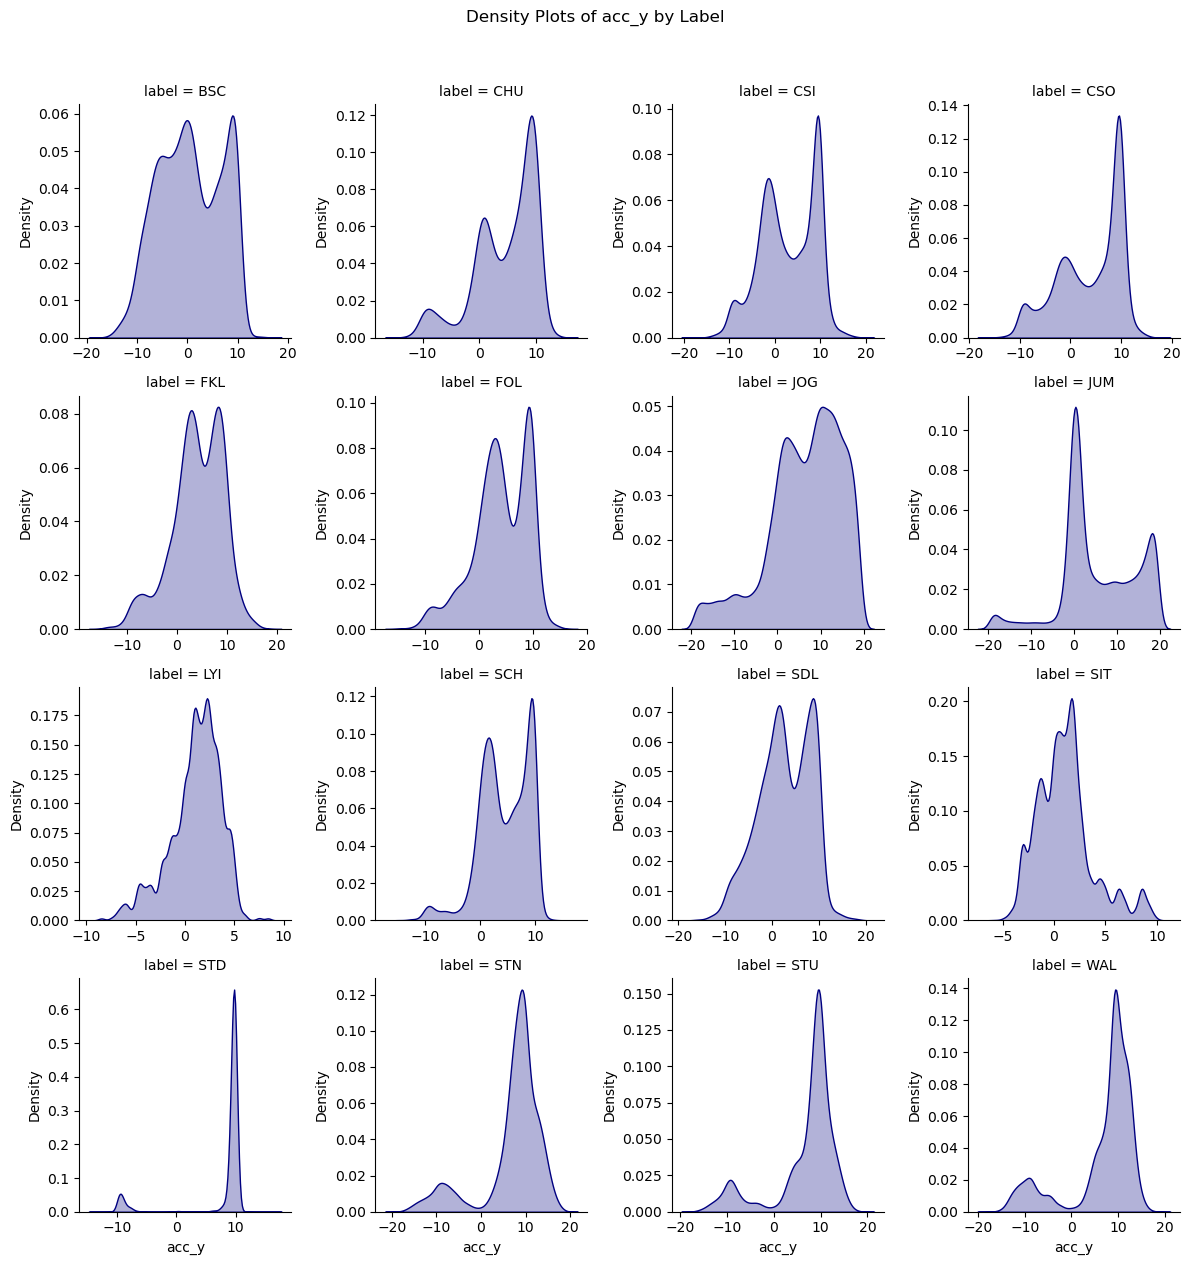

In [ ]:
g = sns.FacetGrid(df, col="label", col_wrap=4, sharex=False, sharey=False)
g.map_dataframe(sns.kdeplot, x="acc_y", fill=True, alpha=0.3)
g.fig.suptitle("Density Plots of acc_y by Label", y=1.05)
plt.show()

c:\Users\sovan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


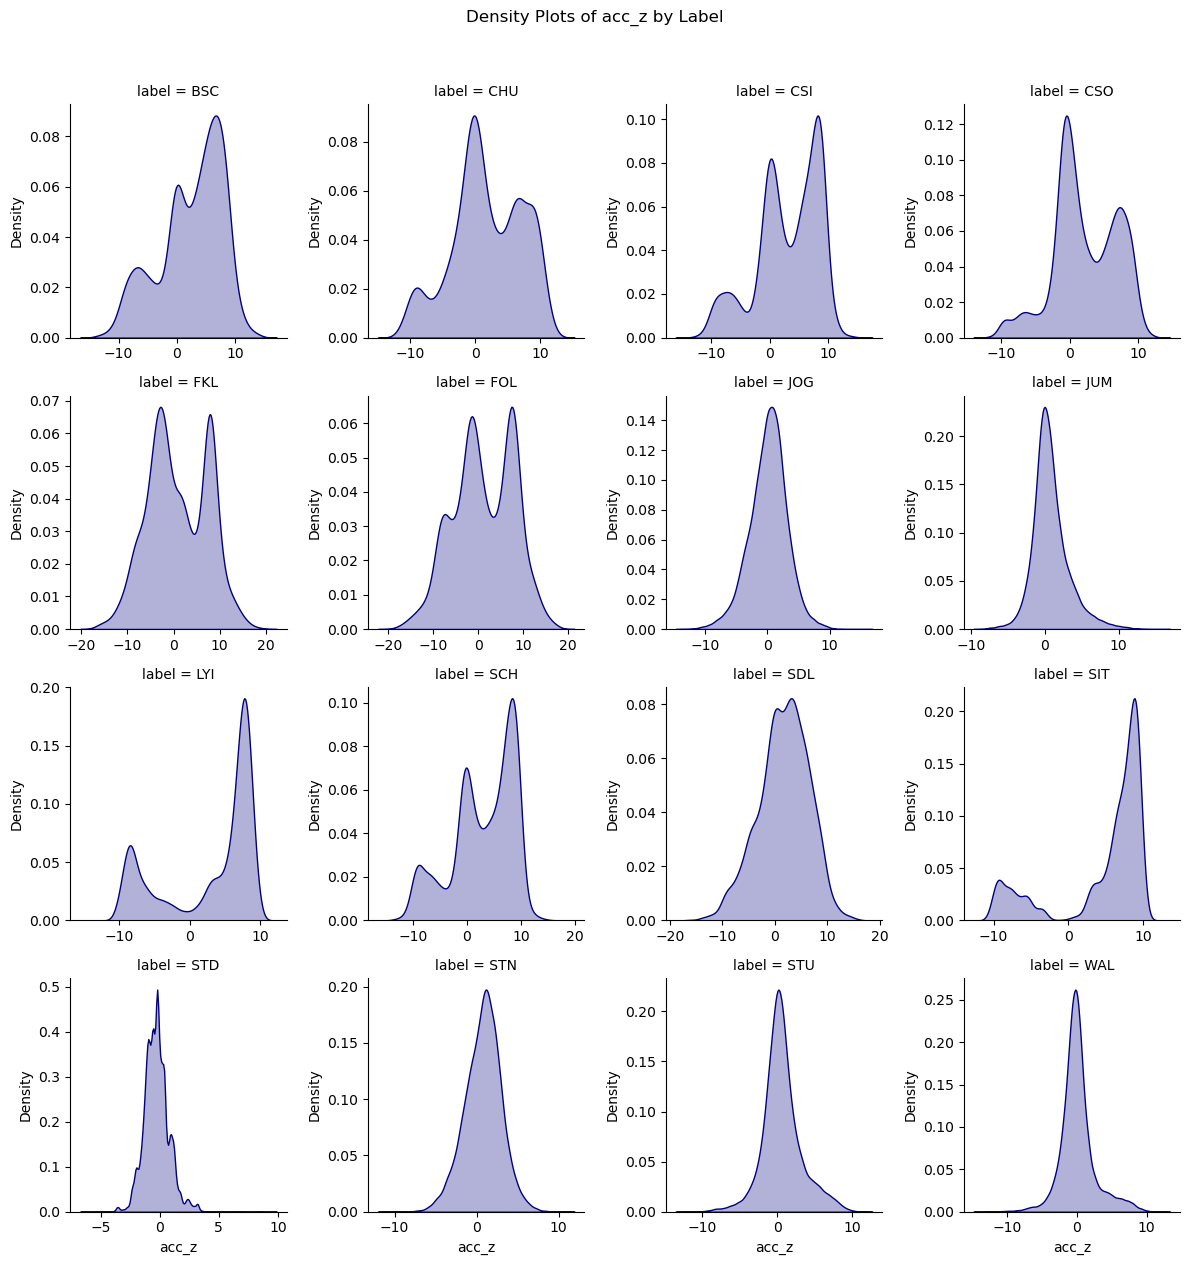

In [ ]:
g = sns.FacetGrid(df, col="label", col_wrap=4, sharex=False, sharey=False)
g.map_dataframe(sns.kdeplot, x="acc_z", fill=True, alpha=0.3)
g.fig.suptitle("Density Plots of acc_z by Label", y=1.05)
plt.show()

c:\Users\sovan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


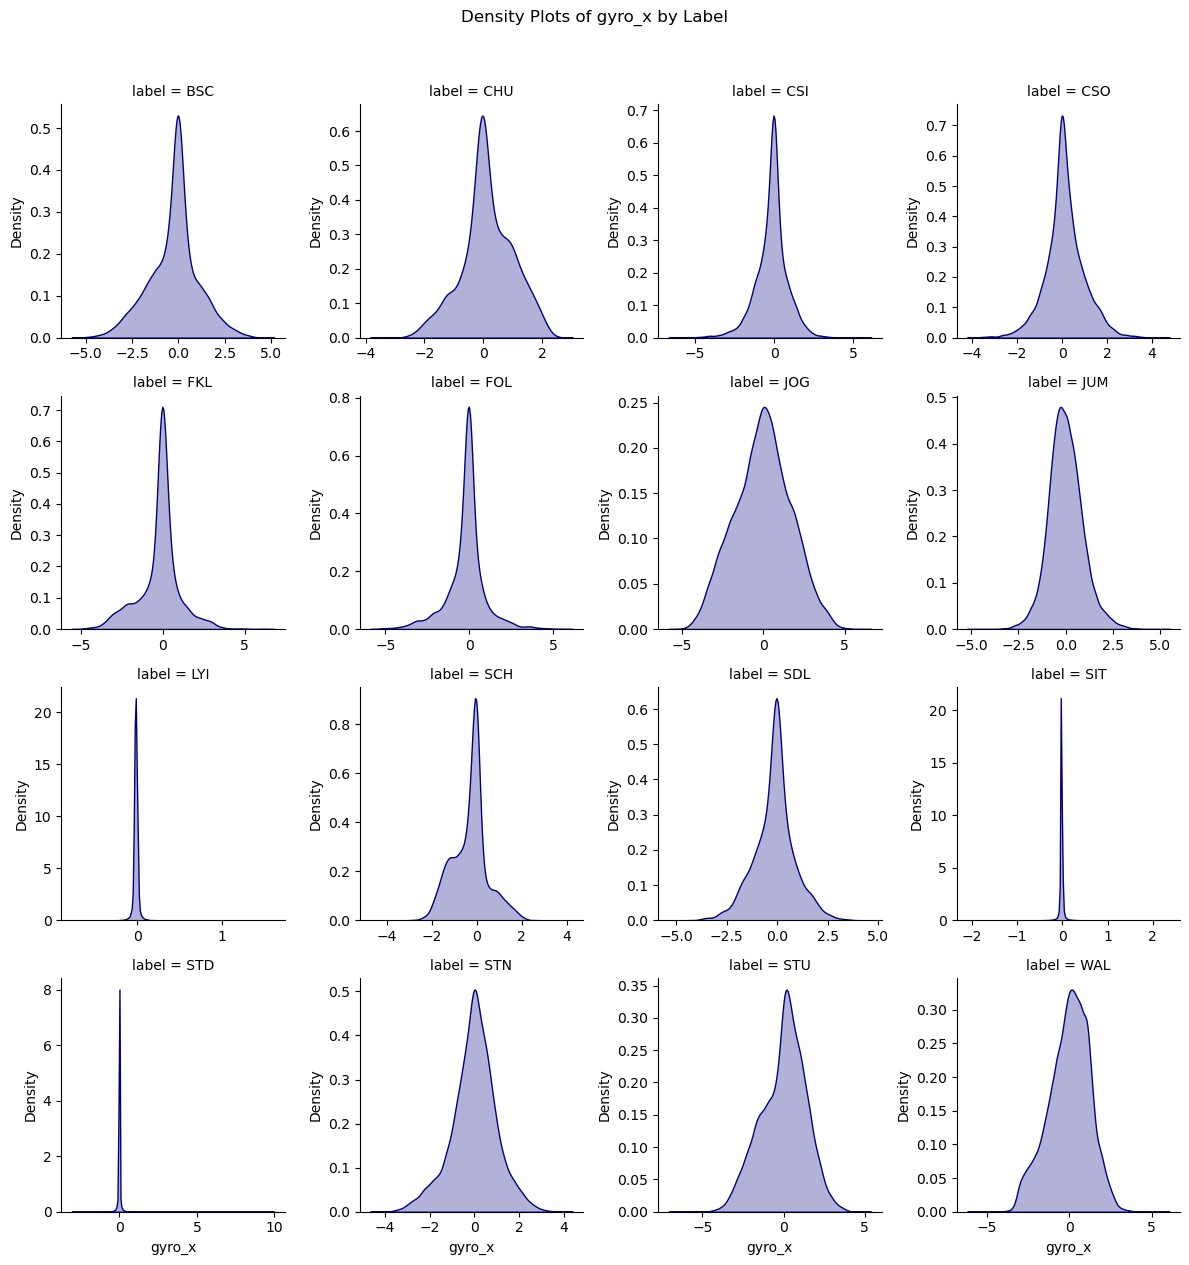

In [ ]:
g = sns.FacetGrid(df, col="label", col_wrap=4, sharex=False, sharey=False)
g.map_dataframe(sns.kdeplot, x="gyro_x", fill=True, alpha=0.3)
g.fig.suptitle("Density Plots of gyro_x by Label", y=1.05)
plt.show()

c:\Users\sovan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


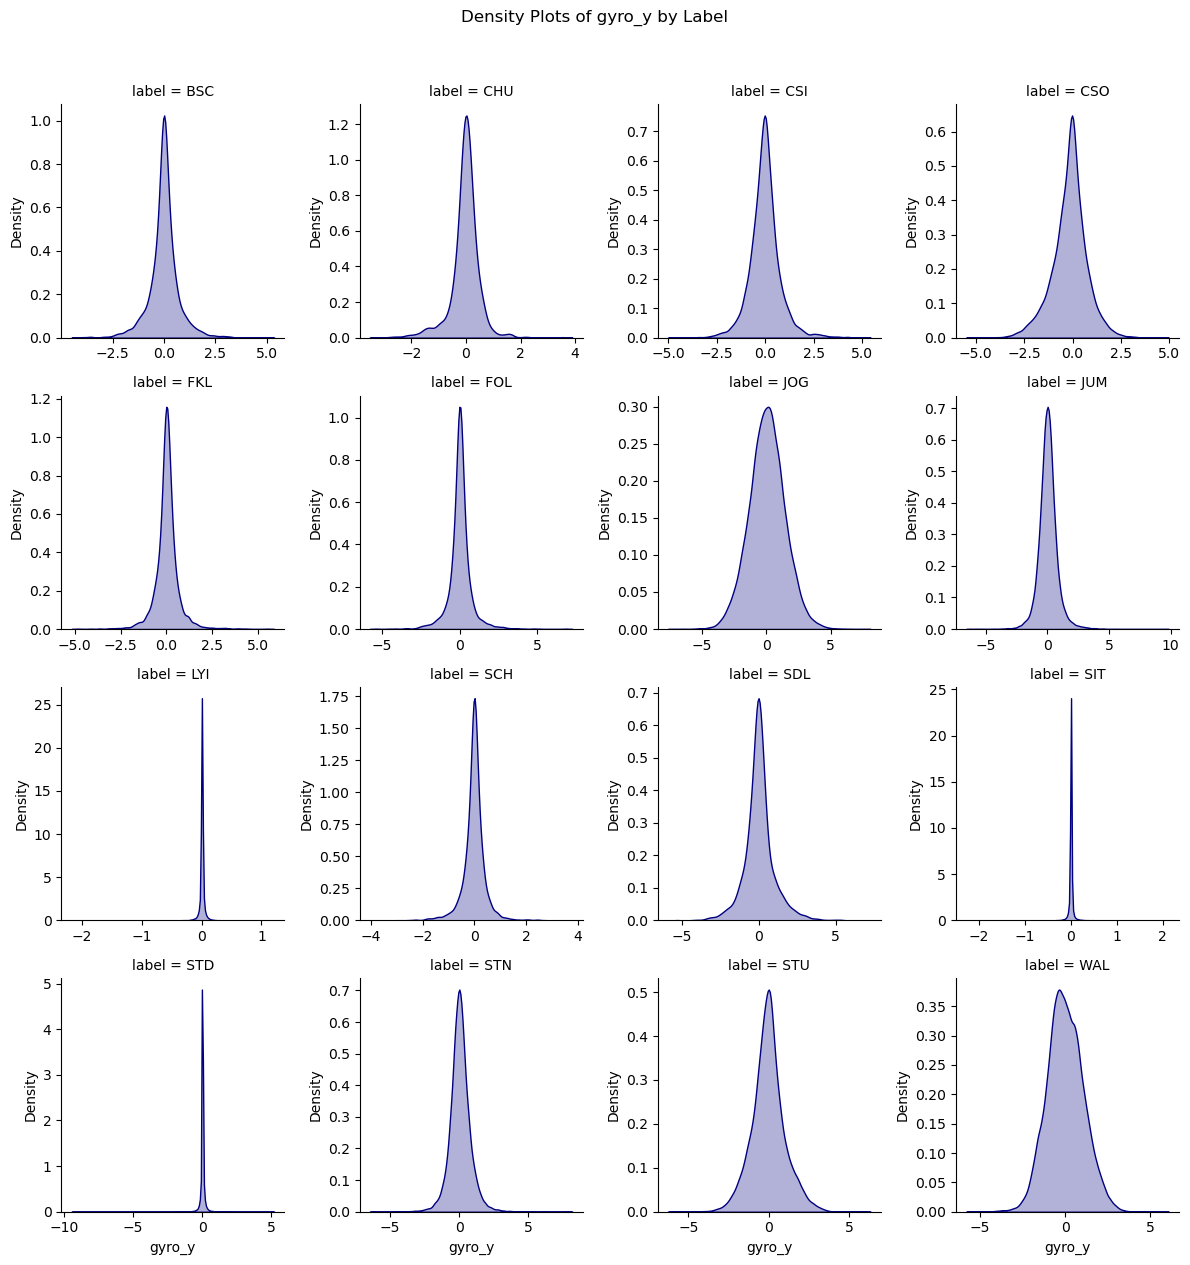

In [ ]:
g = sns.FacetGrid(df, col="label", col_wrap=4, sharex=False, sharey=False)
g.map_dataframe(sns.kdeplot, x="gyro_y", fill=True, alpha=0.3)
g.fig.suptitle("Density Plots of gyro_y by Label", y=1.05)
plt.show()

c:\Users\sovan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


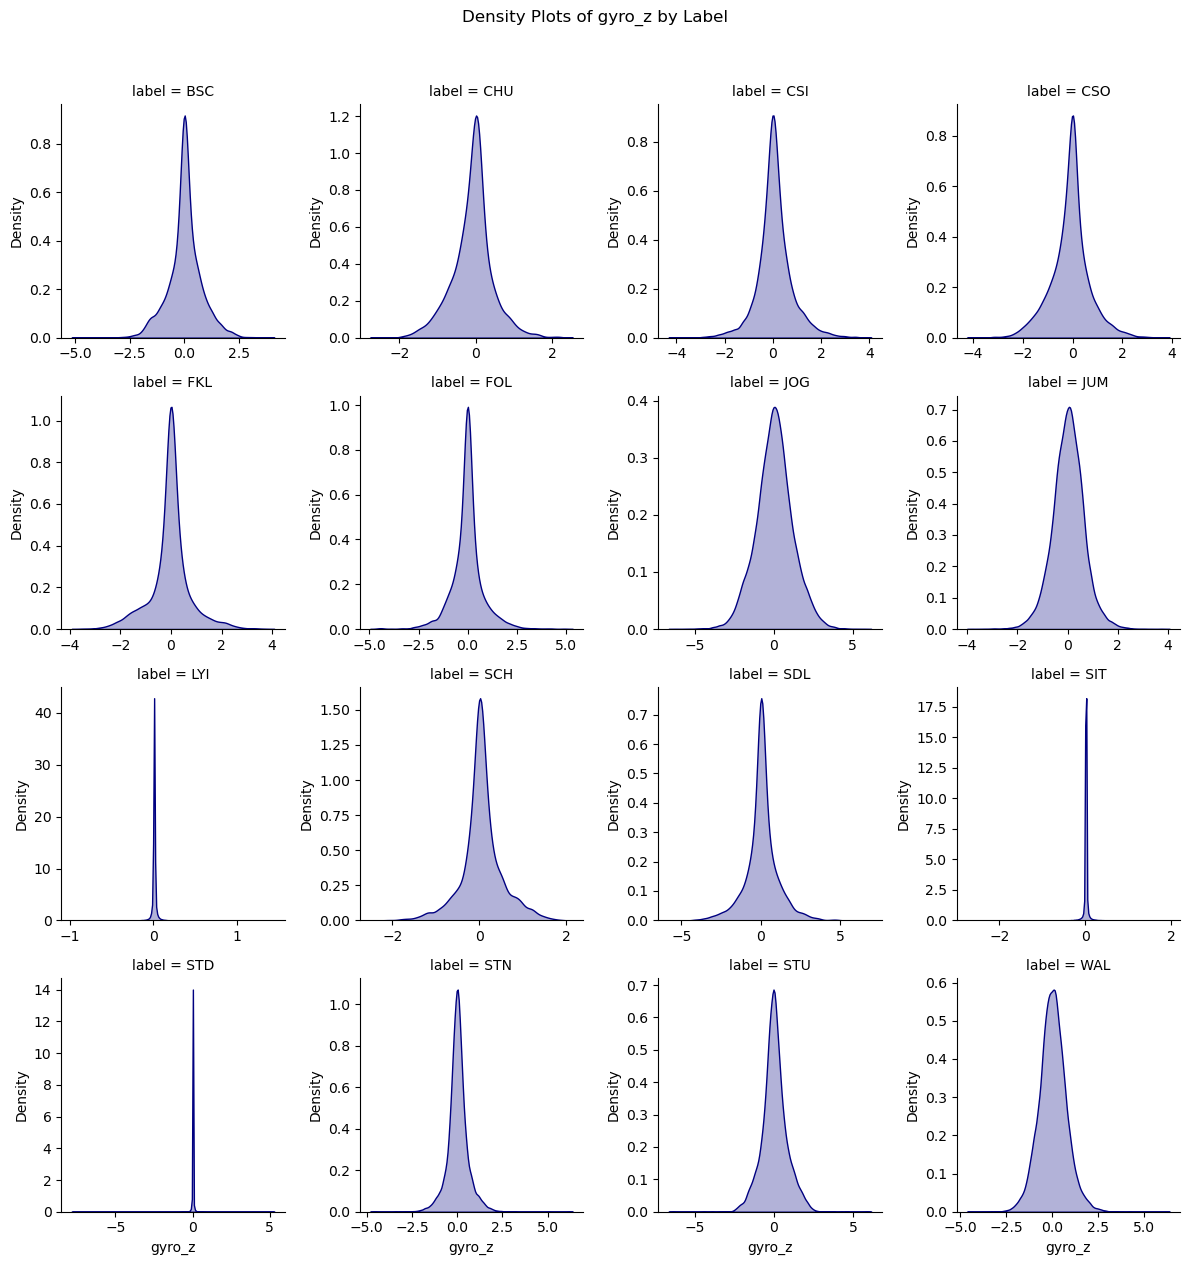

In [ ]:
g = sns.FacetGrid(df, col="label", col_wrap=4, sharex=False, sharey=False)
g.map_dataframe(sns.kdeplot, x="gyro_z", fill=True, alpha=0.3)
g.fig.suptitle("Density Plots of gyro_z by Label", y=1.05)
plt.show()

There are a lot of of multiple peaks distribution and really heavy tails in the dataset hence, cheveneut may not be effective in removing outliers

#### Isolation Forest to remove outliers

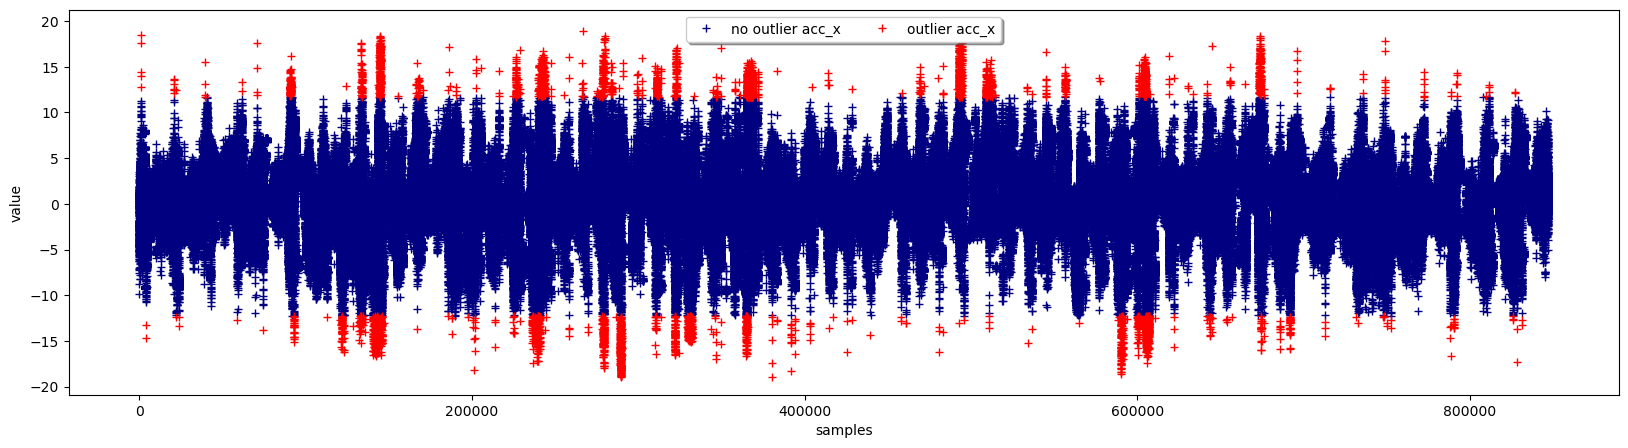

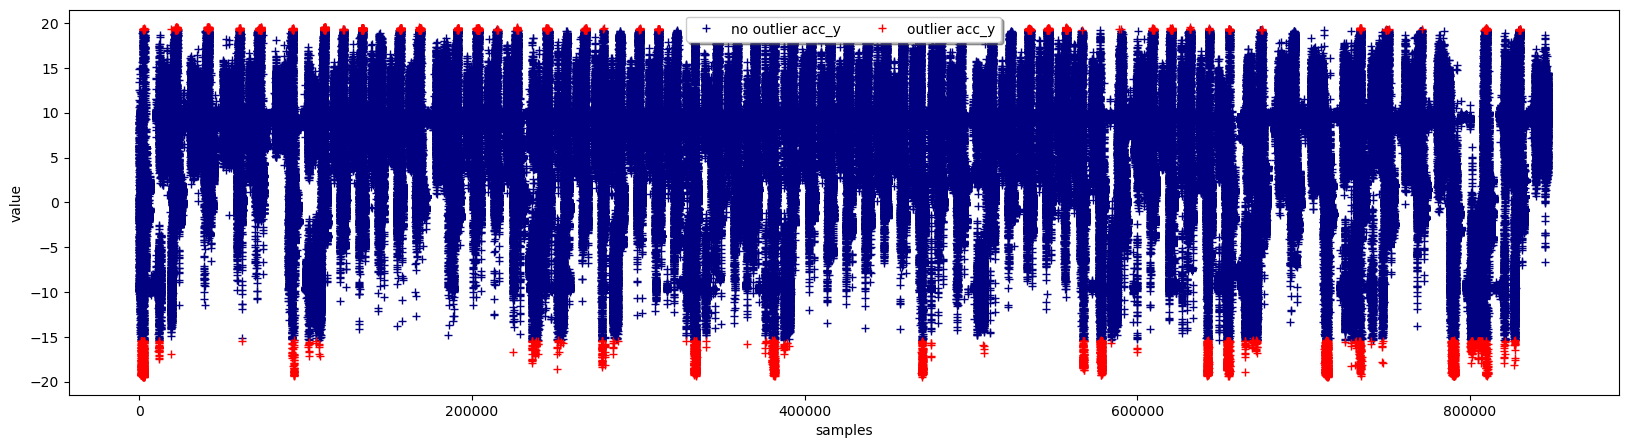

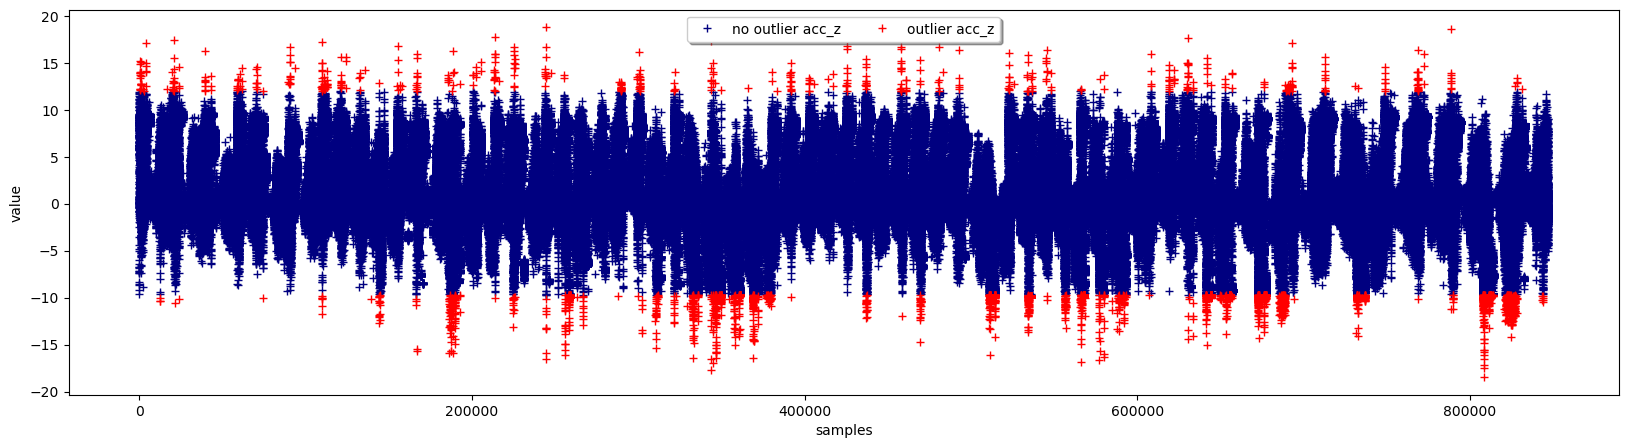

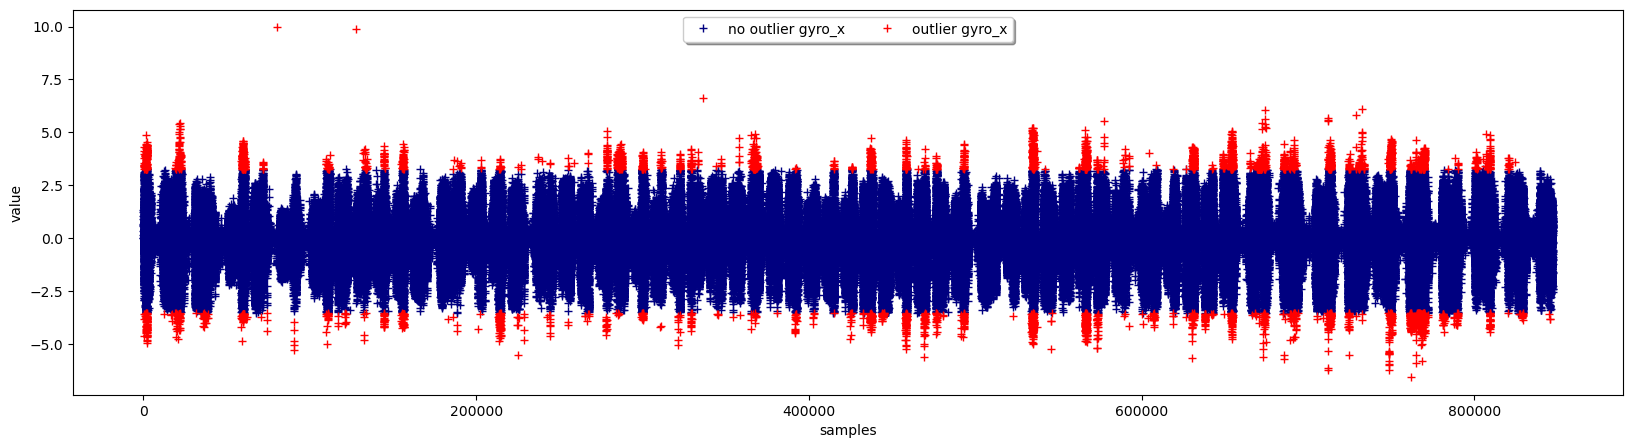

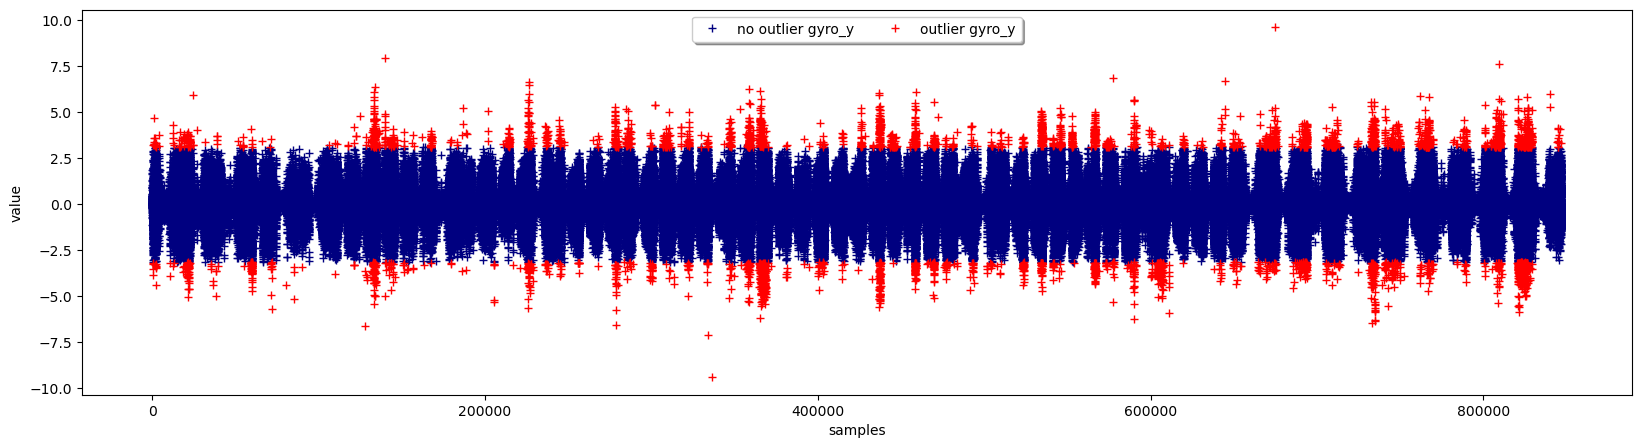

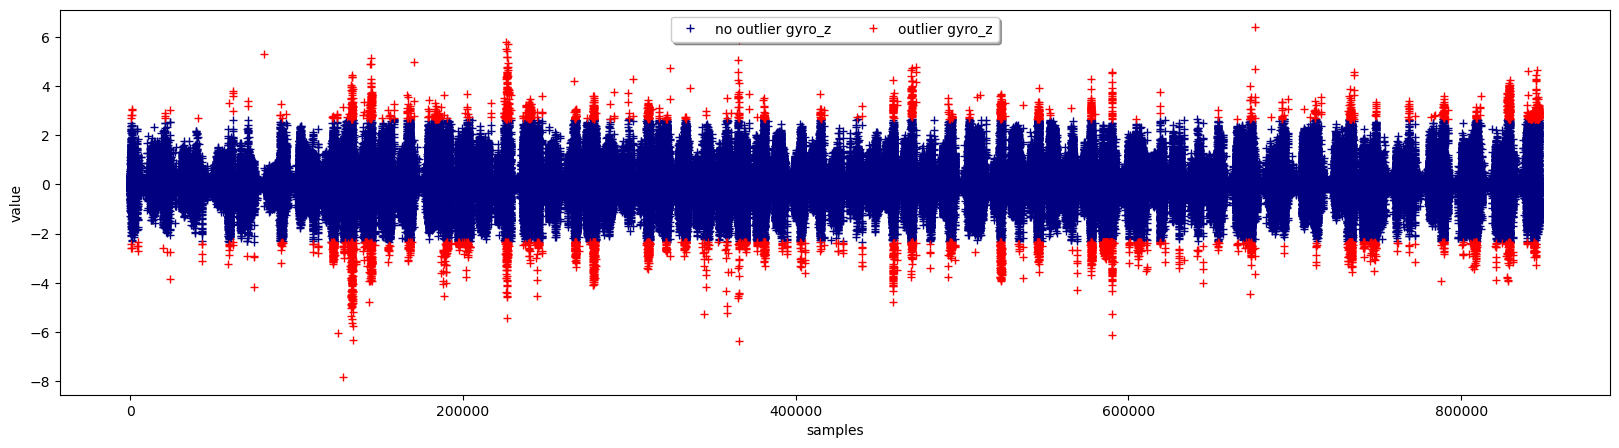

In [34]:
for col in outlier_columns:
    dataset=mark_outliers_isolation_forest(df, col)
    plot_binary_outliers(dataset=dataset, col=col, outlier_col=col+"_outlier", reset_index =True)

In [ ]:
# Apply the isolation forest outliers detection scheme for now

outliers_removed_df = df.copy()


Key Learnings and next step:

1. Different decisions on outliers will likely impact model performance. We need to try different outliers removal save it as different sets for model evaluation later.
2. It will likely imapact time-based features
3. Ideally, we want to not remove too much outliers while filtering out the noises in the sensor data.

For feature engineering:
+ Removal of these outliers will likely impact time-based features that utilize time windows to calculate metrics.